# 10 - Exploratory statistics at point level


The goal of this notebook is to do Exploratory Data Analysis of pest consumption at sampling points.



In [1]:
# import modules
import pandas as pd
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

In [2]:
# configure the number of columns to see inn outputs
pd.set_option('display.max_columns', None)

In [3]:
# read point level data, simple format
point_simple = pd.read_csv('../process_data/point_consumpt_simple.csv')

In [4]:
# preview table
point_simple.head()

,SAMPLING EVENT IDENTIFIER,COUNTRY,COUNTRY CODE,STATE,STATE CODE,COUNTY,COUNTY CODE,LOCALITY_x,LOCALITY ID_x,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION DATE,TIME OBSERVATIONS STARTED,OBSERVER ID,PROTOCOL TYPE,PROTOCOL CODE,DURATION MINUTES,EFFORT DISTANCE KM,NUMBER OBSERVERS,GROUP IDENTIFIER,geometry_x,geometry_y,area_buff,entr_f_area,count_area,count_crop,count_ncrop,count_wood,count_nwood,count_feed,count_tcrop,count_pcrop,total_area,total_crop_area,total_ncrop_area,total_wood_area,total_nwood_area,total_feed_area,total_temp_area,total_perm_area,consum_temp_ha,consum_perm_ha,obs_count_total,count_sps_annual,count_sps_perm,point_cons_tot_t,point_cons_tot_p,point_cons_tot_rest,point_cons_grand_tot,point_cons_temp_ha,point_cons_perm_ha,Trees_dependency,exists,count_ind_annual,count_ind_perm,Tree_high,Tree_low,Tree_medium,Invertivore Aerial,Invertivore Generalist,Invertivore Generalist Generalist,Invertivore Insessorial,Invertivore Insessorial Generalist,Invertivore aerial,Invertivore bark,Invertivore glean arboreal,Invertivore ground,Invertivore sally air,Invertivore sally ground,Invertivore sally surface,Omnivore Generalist,Omnivore Insessorial,Omnivore Terrestrial
0,S100923939,United States,US,California,US-CA,Monterey,US-CA-053,Gonzales--Shell station,L2824373,P,36.523708,-121.465809,2014-04-05,10:20:00,obsr338000,Stationary,P21,10.0,NaN,34.0,G7732261,POINT (-121.4658093 36.5237082),POLYGON ((-2231436.4035407007 1798307.29557750...,313.29,4.318471,56,36,20,4,52,50,27,9,313.29,130.23,183.06,51.03,262.26,237.78,91.44,38.79,3.936866,3.936866,13,3.0,4.0,38036.744131,17020.314156,45468.683242,100525.741529,415.974892,438.780978,Low,both,12.0,13,0.076923,0.615385,0.307692,0.0,0.0,0.0,0.0,0.0,0.153846,0.0,0.076923,0.0,0.0,0.0,0.0,0.000000,0.000000,0.769231
1,S101565234,United States,US,California,US-CA,Solano,US-CA-095,"Timm Road Property, 95694, Winters US-CA (38.4...",L17568374,P,38.470467,-121.967556,2019-05-02,09:01:00,obsr2483749,Stationary,P21,30.0,NaN,1.0,NaN,POINT (-121.967556 38.470467),POLYGON ((-2215459.5212913635 2020276.15133693...,313.47,0.786361,32,18,14,2,30,27,9,9,313.47,17.37,296.10,5.67,307.80,297.27,7.02,10.35,0.000000,67.883705,10,2.0,4.0,2624.764090,10611.937628,213296.074320,226532.776039,373.898019,1025.307983,Low,both,2.0,10,0.600000,0.300000,0.100000,0.0,0.0,0.0,0.0,0.2,0.000000,0.0,0.600000,0.1,0.0,0.0,0.0,0.000000,0.000000,0.100000
2,S102616202,United States,US,California,US-CA,Sacramento,US-CA-067,florin Creek,L16687664,P,38.489002,-121.422516,2021-04-06,16:00:00,obsr2622871,Traveling,P22,10.0,0.0,1.0,NaN,POINT (-121.4225159 38.4890022),POLYGON ((-2169515.6178246057 2009697.73506322...,313.83,1.286693,9,1,8,1,8,3,0,1,313.83,1.26,312.57,1.26,312.57,2.70,0.00,1.26,NaN,243395.220368,20,1.0,1.0,0.000000,306677.977664,350489.117330,657167.094994,0.000000,243395.220368,Medium,both,20.0,20,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000
3,S10320833,United States,US,California,US-CA,Sacramento,US-CA-067,My Patio,L1467244,P,38.613748,-121.506437,2012-04-01,07:13:00,obsr301967,Stationary,P21,15.0,NaN,1.0,NaN,POINT (-121.5064373 38.613748),POLYGON ((-2172800.1195760537 2025099.19303472...,313.65,2.864587,19,8,11,2,17,14,5,3,313.65,2.52,311.13,0.54,313.11,4.14,2.16,0.36,0.000000,193549.011126,15,3.0,5.0,41077.284376,90417.422704,84532.311694,216027.018774,19017.261285,251159.507510,Medium,both,8.0,15,0.000000,0.466667,0.533333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.133333,0.466667,0.400000
4,S10325611,United States,US,California,US-CA,Butte,US-CA-007,Bidwell Jr. High School,L823566,P,39.755150,-121.837446,2012-04-01,08:45:00,obsr168441,Stationary,P21,30.0,NaN,1.0,NaN,POINT (-121.8374455 39.7551499),POLYGON ((-2165963.746995048 2155944.127851472...,313.74,0.000000,5,0,5,0,5,0,0,0,313.74,0.00,313.74,0.00,313.74,0.00,0.00,0.00,NaN,NaN,4,0.0,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Medium,both,0.0,4,0.500000,0.250000

First, we will add the shannon and richness indices data to the table

In [5]:
# read species counts per point and biodiversity indices
biodiv_ind = pd.read_csv('../process_data/biodiversity_data.csv')

In [6]:
# merge biodiveersity indices to the data table
df = pd.merge(point_simple, biodiv_ind[['SAMPLING EVENT IDENTIFIER', 'shannon', 'richness']], 
                     left_on=['SAMPLING EVENT IDENTIFIER'], right_on=['SAMPLING EVENT IDENTIFIER'])

In [7]:
df.describe()

,LATITUDE,LONGITUDE,DURATION MINUTES,EFFORT DISTANCE KM,NUMBER OBSERVERS,area_buff,entr_f_area,count_area,count_crop,count_ncrop,count_wood,count_nwood,count_feed,count_tcrop,count_pcrop,total_area,total_crop_area,total_ncrop_area,total_wood_area,total_nwood_area,total_feed_area,total_temp_area,total_perm_area,consum_temp_ha,consum_perm_ha,obs_count_total,count_sps_annual,count_sps_perm,point_cons_tot_t,point_cons_tot_p,point_cons_tot_rest,point_cons_grand_tot,point_cons_temp_ha,point_cons_perm_ha,count_ind_annual,count_ind_perm,Tree_high,Tree_low,Tree_medium,Invertivore Aerial,Invertivore Generalist,Invertivore Generalist Generalist,Invertivore Insessorial,Invertivore Insessorial Generalist,Invertivore aerial,Invertivore bark,Invertivore glean arboreal,Invertivore ground,Invertivore sally air,Invertivore sally ground,Invertivore sally surface,Omnivore Generalist,Omnivore Insessorial,Omnivore Terrestrial,shannon,richness
count,18783.000000,18783.000000,18783.000000,4974.000000,18692.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,13658.000000,14071.000000,18783.000000,18783.000000,18783.000000,1.878300e+04,1.878300e+04,1.878300e+04,1.878300e+04,1.878300e+04,1.878300e+04,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,1.878300e+04,18783.000000
mean,38.004859,-121.064763,12.590428,0.418600,1.397657,311.840532,1.761248,22.967471,11.344886,11.622584,2.652239,20.315232,17.943300,6.737635,4.607251,311.840532,53.616948,258.223584,48.707379,263.133153,175.309866,22.803421,30.813527,511.433218,3868.376828,21.558963,1.942288,4.202843,1.570078e+04,2.567138e+04,1.190413e+05,1.604135e+05,2.288579e+03,9.855415e+03,17.371240,21.558963,0.201030,0.348199,0.450771,0.010230,0.042507,0.001643,0.012156,0.054592,0.145066,0.021542,0.142503,0.084641,0.004645,0.003500,0.016172,0.084995,0.222417,0.153391,1.013575e+00,4.202470
std,1.013723,0.755563,8.772956,0.246358,4.484449,13.498226,1.119347,13.610939,10.248400,4.094881,1.770395,13.264245,12.867427,6.778227,3.881454,13.498226,84.497820,84.811081,84.233147,85.578936,121.075228,45.419077,61.929960,11078.761798,26498.637401,132.095437,1.694785,3.008375,8.879417e+04,9.233027e+04,3.839411e+05,4.387071e+05,3.669722e+04,9.015171e+04,132.134346,132.095437,0.272978,0.352619,0.338876,0.065394,0.127959,0.037309,0.053898,0.159887,0.269865,0.077460,0.228464,0.200884,0.045875,0.038046,0.070681,0.176718,0.284841,0.273499,6.883145e-01,3.007436
min,34.994465,-122.464294,1.000000,0.000000,1.000000,70.470000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,70.470000,0.000000,8.820000,0.000000,5.400000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,-1.121844e-11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,1.000000
25%,37.420917,-121.540001,5.000000,0.201000,1.000000,313.380000,0.906868,10.000000,1.000000,9.000000,1.000000,7.000000,7.000000,0.000000,0.000000,313.380000,0.180000,222.795000,0.360000,268.020000,44.955000,0.000000,0.000000,0.000000,41.074887,3.000000,1.000000,2.000000,0.000000e+00,0.000000e+00,5.617762e+02,2.970179e+03,0.000000e+00,0.000000e+00,1.000000,3.000000,0.000000,0.000000,0.153846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.623351e-01,2.000000
50%,38.396085,-121.288367,10.000000,0.354000,1.000000,313.650000,1.750160,22.000000,10.000000,12.000000,

In [16]:
# filter data to remove areas that have no consumption in a copy of the dataset

df_zero = df[(point_simple['point_cons_temp_ha'] == 0) & \
                             (point_simple['point_cons_perm_ha'] == 0)]

In [17]:
df_zero.describe()

,LATITUDE,LONGITUDE,DURATION MINUTES,EFFORT DISTANCE KM,NUMBER OBSERVERS,area_buff,entr_f_area,count_area,count_crop,count_ncrop,count_wood,count_nwood,count_feed,count_tcrop,count_pcrop,total_area,total_crop_area,total_ncrop_area,total_wood_area,total_nwood_area,total_feed_area,total_temp_area,total_perm_area,consum_temp_ha,consum_perm_ha,obs_count_total,count_sps_annual,count_sps_perm,point_cons_tot_t,point_cons_tot_p,point_cons_tot_rest,point_cons_grand_tot,point_cons_temp_ha,point_cons_perm_ha,count_ind_annual,count_ind_perm,Tree_high,Tree_low,Tree_medium,Invertivore Aerial,Invertivore Generalist,Invertivore Generalist Generalist,Invertivore Insessorial,Invertivore Insessorial Generalist,Invertivore aerial,Invertivore bark,Invertivore glean arboreal,Invertivore ground,Invertivore sally air,Invertivore sally ground,Invertivore sally surface,Omnivore Generalist,Omnivore Insessorial,Omnivore Terrestrial,shannon,richness
count,4178.000000,4178.000000,4178.000000,1070.000000,4165.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,253.0,139.0,4178.000000,4178.000000,4178.000000,4178.0,4178.0,4178.0,4178.0,4178.0,4178.0,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4.178000e+03,4178.000000
mean,38.099346,-120.845741,11.854955,0.378955,1.242737,312.562116,0.489997,6.758258,0.283868,6.474390,1.659646,5.098612,2.785543,0.190761,0.093107,312.562116,1.121532,311.440584,73.665237,238.896879,114.231067,0.420122,0.701410,0.0,0.0,8.082336,1.130685,3.418143,0.0,0.0,0.0,0.0,0.0,0.0,4.091910,8.082336,0.243428,0.253447,0.503124,0.003102,0.030118,0.006610,0.010989,0.096642,0.063659,0.026675,0.196901,0.062088,0.004536,0.002404,0.024073,0.102328,0.295670,0.074205,9.099444e-01,3.417903
std,0.858396,0.733465,8.647073,0.217650,0.927951,13.071509,0.645675,3.634677,1.855269,2.611725,1.992205,2.898795,3.610025,1.206772,0.720901,13.071509,14.856226,19.817774,113.628100,114.389071,142.187213,7.143927,9.795084,0.0,0.0,26.162169,1.154422,2.287798,0.0,0.0,0.0,0.0,0.0,0.0,25.848469,26.162169,0.310242,0.318668,0.351627,0.034564,0.110417,0.076702,0.055276,0.231693,0.197211,0.090649,0.273258,0.172086,0.043098,0.028407,0.084249,0.197931,0.314962,0.186354,6.472328e-01,2.287162
min,35.327388,-122.464294,1.000000,0.000000,1.000000,70.470000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,70.470000,0.000000,40.140000,0.000000,5.400000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,1.000000
25%,37.570216,-121.355066,5.000000,0.161000,1.000000,313.380000,0.000000,4.000000,0.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,313.380000,0.000000,313.290000,0.000000,134.730000,0.000000,0.000000,0.000000,0.0,0.0,2.000000,0.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.119838e-01,2.000000
50%,38.553193,-121.285772,9.000000,0.389000,1.000000,313.650000,0.000000,6.000000,0.000000,6.000000,0.000000,4.000000,1.000000,0.000000,0.000000,313.650000,0.000000,313.650000,0.000000,313.110000,0.090000,0.000000,0.000000,0.0,0.0,5.000000,1.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,5.000000,0.100000,0.119430,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.214286,0.000000,1.011404e+00,3.000000
75%,38

In [8]:
# filter data to remove areas that have no consumption in a copy of the dataset

df_no_zero = df[(point_simple['point_cons_temp_ha'] > 0) & \
                             (point_simple['point_cons_perm_ha'] > 0)]


In [9]:
df_no_zero.describe()

,LATITUDE,LONGITUDE,DURATION MINUTES,EFFORT DISTANCE KM,NUMBER OBSERVERS,area_buff,entr_f_area,count_area,count_crop,count_ncrop,count_wood,count_nwood,count_feed,count_tcrop,count_pcrop,total_area,total_crop_area,total_ncrop_area,total_wood_area,total_nwood_area,total_feed_area,total_temp_area,total_perm_area,consum_temp_ha,consum_perm_ha,obs_count_total,count_sps_annual,count_sps_perm,point_cons_tot_t,point_cons_tot_p,point_cons_tot_rest,point_cons_grand_tot,point_cons_temp_ha,point_cons_perm_ha,count_ind_annual,count_ind_perm,Tree_high,Tree_low,Tree_medium,Invertivore Aerial,Invertivore Generalist,Invertivore Generalist Generalist,Invertivore Insessorial,Invertivore Insessorial Generalist,Invertivore aerial,Invertivore bark,Invertivore glean arboreal,Invertivore ground,Invertivore sally air,Invertivore sally ground,Invertivore sally surface,Omnivore Generalist,Omnivore Insessorial,Omnivore Terrestrial,shannon,richness
count,10912.000000,10912.000000,10912.000000,3150.000000,10907.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,1.091200e+04,1.091200e+04,1.091200e+04,1.091200e+04,10912.000000,1.091200e+04,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,1.091200e+04,10912.000000
mean,37.931086,-121.176614,12.741202,0.431586,1.454387,311.712600,2.270916,30.601998,16.895161,13.706837,2.859971,27.742027,25.103831,10.129399,6.765762,311.712600,82.763174,228.949426,28.098624,283.613976,201.099523,35.975240,46.787933,395.926410,2405.561348,30.324230,2.608504,4.808926,2.668105e+04,3.897236e+04,1.704276e+05,2.360811e+05,2583.487170,7.536236e+03,26.131323,30.324230,0.147566,0.413219,0.439215,0.015300,0.051341,0.000041,0.011657,0.030441,0.205527,0.015368,0.094802,0.104395,0.002574,0.002742,0.008519,0.097793,0.144459,0.215043,1.121385e+00,4.808376
std,1.084989,0.743330,8.823523,0.253205,5.784108,13.603891,0.918701,10.528089,8.578972,2.889578,1.556796,10.439156,10.105644,6.230748,2.987483,13.603891,93.341915,93.139344,51.287035,53.200824,102.106861,53.216021,71.317633,4482.874082,18608.268070,164.891676,1.671093,3.241630,1.150133e+05,1.145226e+05,4.731268e+05,5.409431e+05,14323.822121,5.576794e+04,164.975413,164.891676,0.206655,0.351064,0.321576,0.080185,0.139209,0.003279,0.045902,0.075998,0.302298,0.047481,0.158941,0.219936,0.022678,0.024120,0.039010,0.182862,0.191398,0.310365,6.787429e-01,3.240382
min,34.994465,-122.438558,1.000000,0.000000,1.000000,142.740000,0.019321,5.000000,2.000000,3.000000,0.000000,4.000000,2.000000,1.000000,1.000000,142.740000,0.180000,8.820000,0.000000,23.040000,0.180000,0.090000,0.090000,0.000000,0.000000,1.000000,1.000000,1.000000,1.227295e-01,5.281794e-01,-1.121844e-11,3.144166e+02,1.075922,1.075922e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,1.000000
25%,36.961870,-121.713054,5.000000,0.240000,1.000000,313.380000,1.621879,22.000000,10.000000,12.000000,2.000000,20.000000,17.000000,5.000000,5.000000,313.380000,3.600000,164.250000,0.900000,284.940000,106.740000,1.080000,2.430000,0.000000,35.480955,5.000000,1.000000,2.000000,5.428216e+02,2.296573e+03,1.668581e+04,4.340802e+04,134.352859,3.000799e+02,2.000000,5.000000,0.000000,0.074074,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.365142e-01,2.000000
50%,38.372234,-121.351636,10.000000,0.355000,1.000000,313.650000,2.390082,30.000000,17.000000,14.000000,

We will create a table with a subset of columns that can be analysed through EDA.

In [9]:
# select variables to perform analysis
df1 = df_no_zero[['point_cons_temp_ha', 'point_cons_perm_ha', 'count_ind_annual', 'count_ind_perm', 
                    'obs_count_total', 'count_sps_annual', 'count_sps_perm', 'Tree_high', 'Tree_low', 'Tree_medium',
                    'shannon', 'richness', 'Invertivore Generalist Generalist', 
                    'Invertivore Insessorial', 'Invertivore sally ground', 'Invertivore sally surface', 
                    'Invertivore sally air', 'Invertivore Aerial', 'Invertivore bark', 
                    'Invertivore Generalist', 'Invertivore Insessorial Generalist', 
                    'Invertivore ground', 'Omnivore Generalist', 'Invertivore glean arboreal', 
                    'Omnivore Insessorial', 'Invertivore aerial', 
                    'Omnivore Terrestrial',
                    'entr_f_area', 'total_crop_area', 'total_feed_area', 'total_wood_area',  
                    'total_temp_area', 'total_perm_area'
                ]]

In [10]:
# convert consumption values to kg/ha
df1[['point_cons_temp_ha', 'point_cons_perm_ha']] = \
df1[['point_cons_temp_ha', 'point_cons_perm_ha']].apply(lambda x: x/1000, axis = 1)

<ipython-input-10-688cd7f361d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['point_cons_temp_ha', 'point_cons_perm_ha']] = \


In [11]:
# create a dataframe cwith descriptive statistics
stats = df1.describe()

In [12]:
# calculate skewness and add it to the table of decsriptive statistics
skew = df1.skew()
stats_T = stats.T
stats_T['skewness'] = skew
stats = stats_T.T
stats.T.round(2)

,count,mean,std,min,25%,50%,75%,max,skewness
point_cons_temp_ha,10912.0,2.58,14.32,0.00,0.13,0.43,1.32,853.26,28.00
point_cons_perm_ha,10912.0,7.54,55.77,0.00,0.30,0.89,2.35,1842.03,18.44
count_ind_annual,10912.0,26.13,164.98,1.00,2.00,5.00,13.00,7000.00,20.48
count_ind_perm,10912.0,30.32,164.89,1.00,5.00,10.00,19.00,7000.00,20.45
obs_count_total,10912.0,30.32,164.89,1.00,5.00,10.00,19.00,7000.00,20.45
count_sps_annual,10912.0,2.61,1.67,1.00,1.00,2.00,3.00,13.00,1.30
count_sps_perm,10912.0,4.81,3.24,1.00,2.00,4.00,6.00,28.00,1.24
Tree_high,10912.0,0.15,0.21,0.00,0.00,0.00,0.25,1.00,1.50
Tree_low,10912.0,0.41,0.35,0.00,0.07,0.33,0.72,1.00,0.35
Tree_medium,10912.0,0.44,0.32,0.00,0.17,0.40,0.67,1.00,0.34


Results indicate that several variables are highly skewed to the right. This is expected. We will further analyse the distribution calculating histograms and boxplots.

In [13]:
# This function helps to create histograms for all columns of a provided table, 3 per row
def print_hist_plots(data):

    variables = data.columns.tolist()  # Get a list of all column names

    num_variables = len(variables)
    num_rows = (num_variables - 1) // 3 + 1  # Calculate the number of subplot rows
    fig, axs = plt.subplots(num_rows, 3, figsize=(10, 3 * num_rows))

    for i, variable in enumerate(variables):
        row = i // 3
        col = i % 3

        sns.histplot(data=data, x=variable, kde=False, ax=axs[row, col])

        axs[row, col].set_title(variable.capitalize())  # Set variable name as subplot title

    plt.tight_layout()  # Adjust subplot spacing
    plt.show()

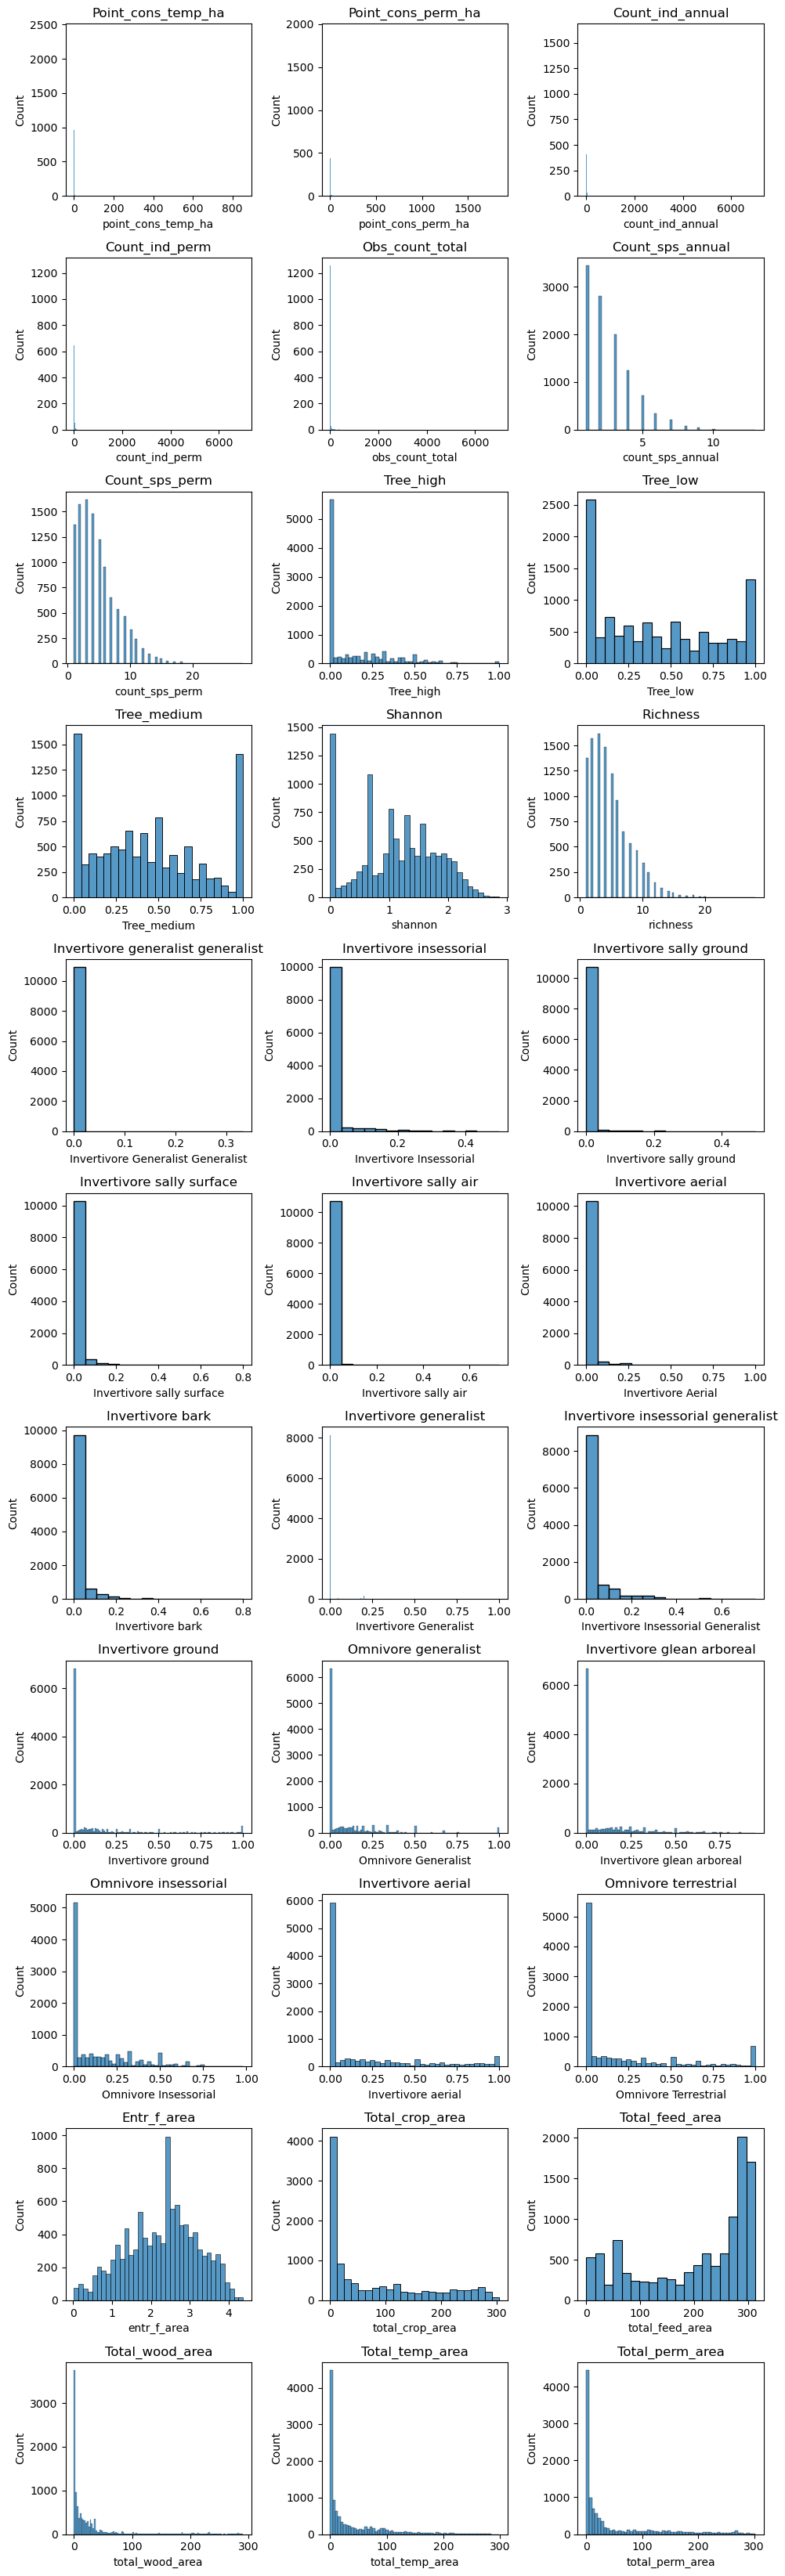

CPU times: user 31.1 s, sys: 404 ms, total: 31.5 s
Wall time: 31.3 s


In [14]:
%%time
# plot histograms - this can take some time
print_hist_plots(df1)

In [15]:
# function to plot boxplots

def print_boxplots(data):

    variables = data.columns.tolist()  # Get a list of all column names

    num_variables = len(variables)
    num_rows = (num_variables - 1) // 3 + 1  # Calculate the number of subplot rows
    fig, axs = plt.subplots(num_rows, 3, figsize=(10, 2 * num_rows))

    for i, variable in enumerate(variables):
        row = i // 3
        col = i % 3

        sns.boxplot(data=data, x=variable, ax=axs[row, col])

        axs[row, col].set_title(variable.capitalize())  # Set variable name as subplot title

    plt.tight_layout()  # Adjust subplot spacing
    plt.show()

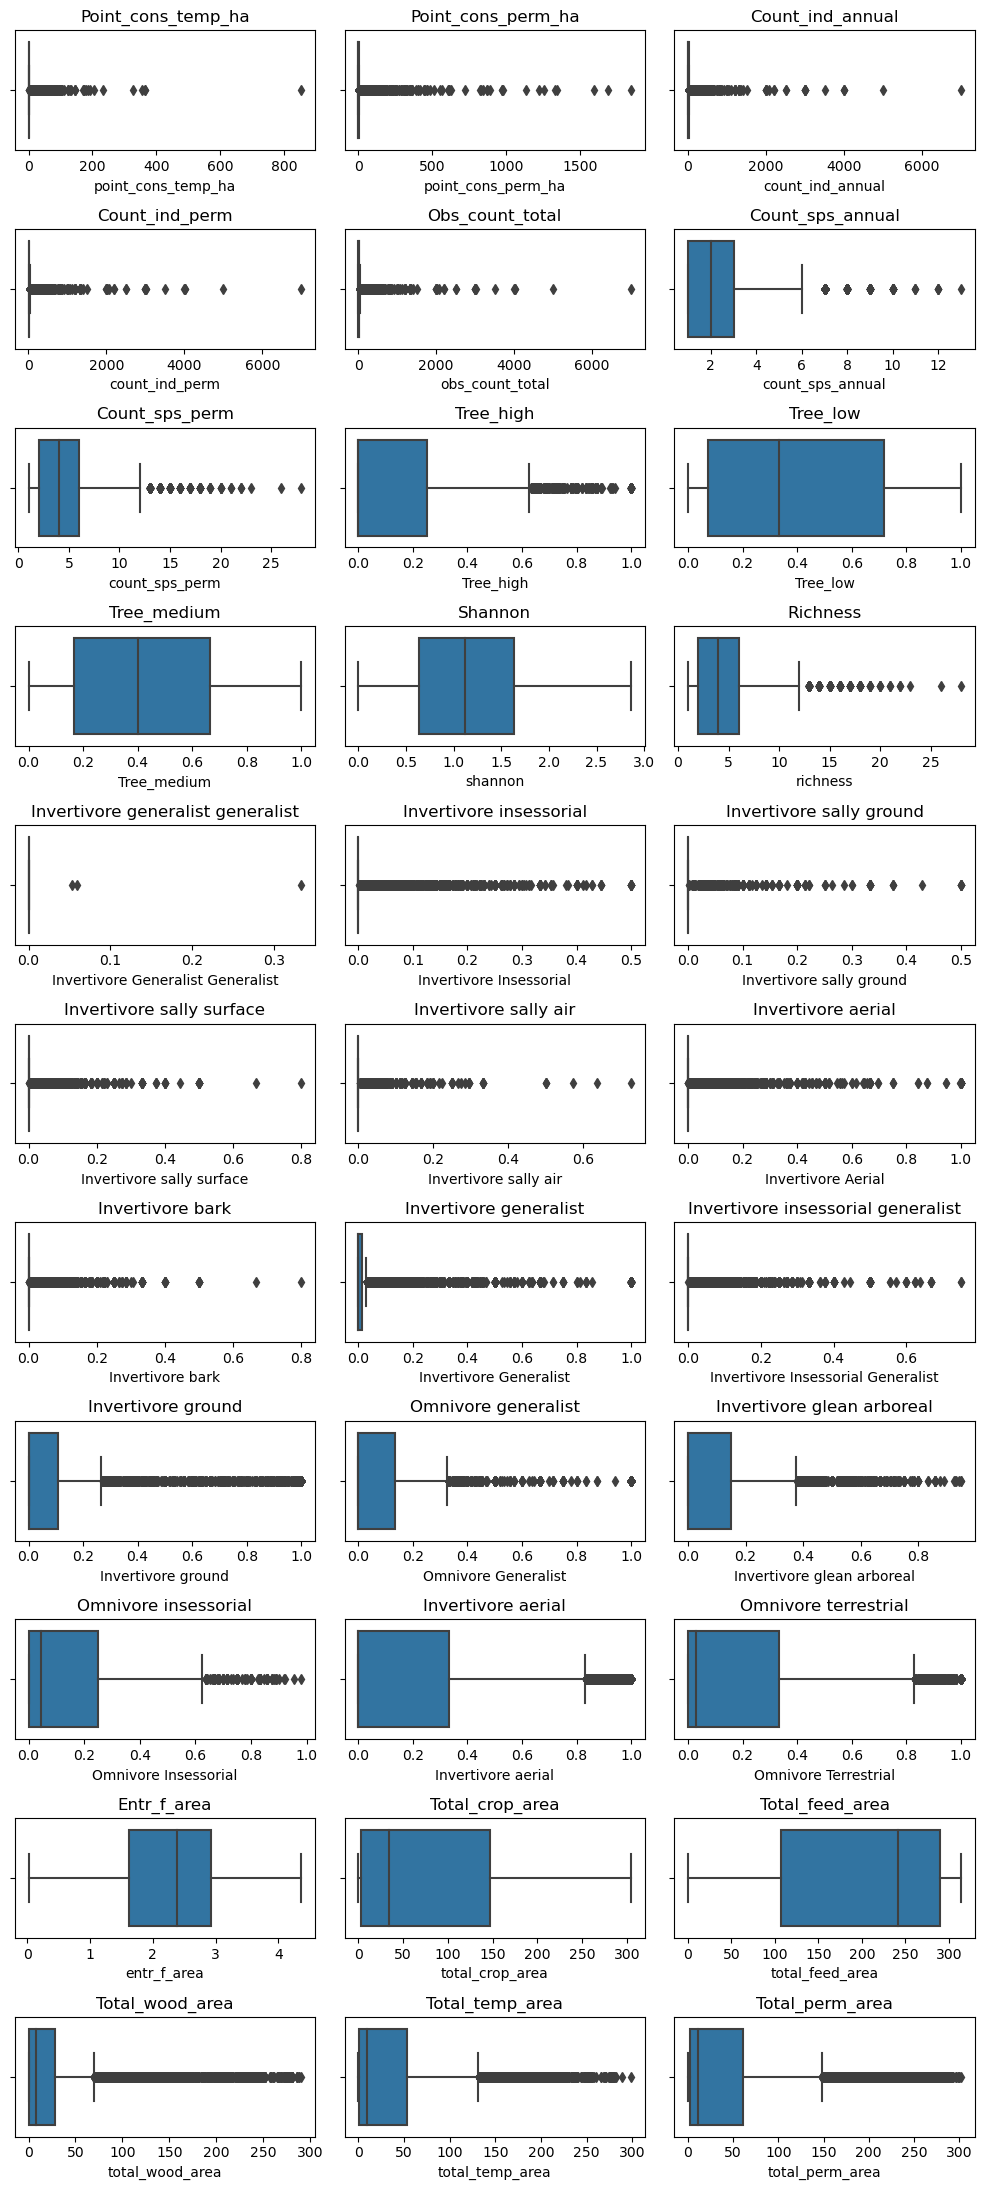

In [16]:
print_boxplots(df1)

Do data transformation of highly skewed data, apllying a logarithm function.

In [17]:
df1[['log_point_cons_temp_ha', 'log_point_cons_perm_ha','log_point_cons_tot_t', 
              'log_point_cons_tot_rest', 'log_point_cons_grand_tot', \
              'log_point_cons_tot_p', 'log_count_ind_annual', 'log_count_ind_perm', \
              'log_count_sps_perm', 'log_count_sps_annual', \
              'log_obs_count_total', 'log_total_crop_area', 'log_total_wood_area', \
              'log_total_perm_area', 'log_total_temp_area', 'log_Tree_high', \
              'log_Invertivore_Generalist_Generalist', 'log_Invertivore_Insessorial', \
              'log_Invertivore_sally_ground', 'log_Invertivore_sally_surface', \
              'log_Invertivore_sally_air', 'log_Invertivore_Aerial', 'log_Invertivore_bark', \
              'log_Invertivore_Generalist', 'log_Invertivore_Insessorial_Generalist', \
              'log_Invertivore_ground', 'log_Omnivore_Generalist', 'log_Invertivore_glean_arboreal', \
              'log_Omnivore_Insessorial', 'log_Invertivore_aerial', \
              'log_Omnivore_Terrestrial']] = \
df[['point_cons_temp_ha', 'point_cons_perm_ha', \
              'point_cons_tot_t', 'point_cons_tot_rest', 'point_cons_grand_tot', \
              'point_cons_tot_p', 'count_ind_annual', 'count_ind_perm', \
              'count_sps_perm','count_sps_annual', \
              'obs_count_total', 'total_crop_area', 'total_wood_area', 'total_perm_area', \
              'total_temp_area', 'Tree_high', \
              'Invertivore Generalist Generalist', 'Invertivore Insessorial', \
              'Invertivore sally ground', 'Invertivore sally surface', \
              'Invertivore sally air', 'Invertivore Aerial', 'Invertivore bark', \
              'Invertivore Generalist', 'Invertivore Insessorial Generalist', \
              'Invertivore ground', 'Omnivore Generalist', 'Invertivore glean arboreal', \
              'Omnivore Insessorial', 'Invertivore aerial', \
              'Omnivore Terrestrial']].apply(lambda x: np.log(x+1), axis = 1)

<ipython-input-17-e34dda9c925a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['log_point_cons_temp_ha', 'log_point_cons_perm_ha','log_point_cons_tot_t',
<ipython-input-17-e34dda9c925a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['log_point_cons_temp_ha', 'log_point_cons_perm_ha','log_point_cons_tot_t',
<ipython-input-17-e34dda9c925a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [18]:
df1.head()

,point_cons_temp_ha,point_cons_perm_ha,count_ind_annual,count_ind_perm,obs_count_total,count_sps_annual,count_sps_perm,Tree_high,Tree_low,Tree_medium,shannon,richness,Invertivore Generalist Generalist,Invertivore Insessorial,Invertivore sally ground,Invertivore sally surface,Invertivore sally air,Invertivore Aerial,Invertivore bark,Invertivore Generalist,Invertivore Insessorial Generalist,Invertivore ground,Omnivore Generalist,Invertivore glean arboreal,Omnivore Insessorial,Invertivore aerial,Omnivore Terrestrial,entr_f_area,total_crop_area,total_feed_area,total_wood_area,total_temp_area,total_perm_area,log_point_cons_temp_ha,log_point_cons_perm_ha,log_point_cons_tot_t,log_point_cons_tot_rest,log_point_cons_grand_tot,log_point_cons_tot_p,log_count_ind_annual,log_count_ind_perm,log_count_sps_perm,log_count_sps_annual,log_obs_count_total,log_total_crop_area,log_total_wood_area,log_total_perm_area,log_total_temp_area,log_Tree_high,log_Invertivore_Generalist_Generalist,log_Invertivore_Insessorial,log_Invertivore_sally_ground,log_Invertivore_sally_surface,log_Invertivore_sally_air,log_Invertivore_Aerial,log_Invertivore_bark,log_Invertivore_Generalist,log_Invertivore_Insessorial_Generalist,log_Invertivore_ground,log_Omnivore_Generalist,log_Invertivore_glean_arboreal,log_Omnivore_Insessorial,log_Invertivore_aerial,log_Omnivore_Terrestrial
0,0.415975,0.438781,12.0,13,13,3.0,4.0,0.076923,0.615385,0.307692,1.204793e+00,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.076923,0.000000,0.153846,0.769231,4.318471,130.23,237.78,51.03,91.44,38.79,6.033026,6.086277,10.546334,10.724801,11.518179,9.742222,2.564949,2.639057,1.609438,1.386294,2.639057,4.876952,3.951820,3.683616,4.526560,0.074108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.074108,0.000000,0.143101,0.570545
1,0.373898,1.025308,2.0,10,10,2.0,4.0,0.600000,0.300000,0.100000,1.088900e+00,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.1,0.000000,0.600000,0.000000,0.000000,0.100000,0.786361,17.37,297.27,5.67,7.02,10.35,5.926654,6.933723,7.873127,12.270441,12.330649,9.269829,1.098612,2.397895,1.609438,1.098612,2.397895,2.910719,1.897620,2.429218,2.081938,0.470004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.182322,0.09531,0.000000,0.470004,0.000000,0.000000,0.095310
3,19.017261,251.159508,8.0,15,15,3.0,5.0,0.000000,0.466667,0.533333,1.564132e+00,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.133333,0.000000,0.466667,0.000000,0.400000,2.864587,2.52,4.14,0.54,2.16,0.36,9.853155,12.433847,10.623235,11.344901,12.283163,11.412203,2.197225,2.772589,1.791759,1.386294,2.772589,1.258461,0.431782,0.307485,1.150572,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.125163,0.000000,0.382992,0.000000,0.336472
6,0.052019,0.052019,5.0,5,5,1.0,1.0,0.000000,0.000000,1.000000,-2.220446e-16,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.676453,192.15,269.82,3.42,112.41,79.74,3.970658,3.970658,8.673940,8.304333,9.549443,8.330629,1.791759,1.791759,0.693147,0.693147,1.791759,5.263467,1.486140,4.391234,4.731010,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.693147
7,0.184710,0.338292,56.0,57,57,4.0,5.0,0.000000,0.105263,0.894737,5.293095e-01,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017544,0.0,0.017544,0.000000,0.000000,0.964912,0.000000,2.554810,85.95,304.56,0.00,79.65,6.30,5.224185,5.826860,9.596495,10.665259,10.996831,7.664927,4.043051,4.060443,1.791759,1.609438,4.060443,4.465333,0.000000,1.987874,4.390119,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017392,0.00000,0.017392,0.000000,0.000000,0.675448,0.000000


In [19]:
print(df1.columns)

Index(['point_cons_temp_ha', 'point_cons_perm_ha', 'count_ind_annual',
       'count_ind_perm', 'obs_count_total', 'count_sps_annual',
       'count_sps_perm', 'Tree_high', 'Tree_low', 'Tree_medium', 'shannon',
       'richness', 'Invertivore Generalist Generalist',
       'Invertivore Insessorial', 'Invertivore sally ground',
       'Invertivore sally surface', 'Invertivore sally air',
       'Invertivore Aerial', 'Invertivore bark', 'Invertivore Generalist',
       'Invertivore Insessorial Generalist', 'Invertivore ground',
       'Omnivore Generalist', 'Invertivore glean arboreal',
       'Omnivore Insessorial', 'Invertivore aerial', 'Omnivore Terrestrial',
       'entr_f_area', 'total_crop_area', 'total_feed_area', 'total_wood_area',
       'total_temp_area', 'total_perm_area', 'log_point_cons_temp_ha',
       'log_point_cons_perm_ha', 'log_point_cons_tot_t',
       'log_point_cons_tot_rest', 'log_point_cons_grand_tot',
       'log_point_cons_tot_p', 'log_count_ind_annual', 'log_co

In [20]:
# select variables to calculate correlations
corr_data = df1[['log_point_cons_temp_ha',
       'log_point_cons_perm_ha','log_count_ind_annual', 'log_count_ind_perm','log_count_sps_annual','log_obs_count_total',
       'log_count_sps_perm', 'shannon', 'richness','log_Tree_high', 'Tree_low', 'Tree_medium',
       'log_Invertivore_Generalist_Generalist', 'log_Invertivore_Insessorial', 
       'log_Invertivore_sally_ground', 'log_Invertivore_sally_surface', 
       'log_Invertivore_sally_air', 'log_Invertivore_Aerial', 'log_Invertivore_bark', 
       'log_Invertivore_Generalist', 'log_Invertivore_Insessorial_Generalist',
       'log_Invertivore_ground', 'log_Omnivore_Generalist',
       'log_Invertivore_glean_arboreal', 'log_Omnivore_Insessorial',
       'log_Invertivore_aerial', 'log_Omnivore_Terrestrial', 
       'entr_f_area','log_total_crop_area', 'total_feed_area',
       'log_total_wood_area',
       'log_total_temp_area', 'log_total_perm_area']]

In [21]:
corr1 = corr_data.corr()
corr1.style.background_gradient(cmap='coolwarm')

,log_point_cons_temp_ha,log_point_cons_perm_ha,log_count_ind_annual,log_count_ind_perm,log_count_sps_annual,log_obs_count_total,log_count_sps_perm,shannon,richness,log_Tree_high,Tree_low,Tree_medium,log_Invertivore_Generalist_Generalist,log_Invertivore_Insessorial,log_Invertivore_sally_ground,log_Invertivore_sally_surface,log_Invertivore_sally_air,log_Invertivore_Aerial,log_Invertivore_bark,log_Invertivore_Generalist,log_Invertivore_Insessorial_Generalist,log_Invertivore_ground,log_Omnivore_Generalist,log_Invertivore_glean_arboreal,log_Omnivore_Insessorial,log_Invertivore_aerial,log_Omnivore_Terrestrial,entr_f_area,log_total_crop_area,total_feed_area,log_total_wood_area,log_total_temp_area,log_total_perm_area
log_point_cons_temp_ha,1.000000,0.854227,0.307033,0.353278,0.341833,0.353278,0.313835,0.251800,0.285453,-0.016917,-0.174347,0.210851,0.001853,-0.032960,-0.008056,-0.066801,-0.017075,0.015557,0.046984,0.292629,0.004781,0.117737,0.166935,0.031210,0.067916,-0.169557,-0.145634,-0.088764,-0.346354,-0.383724,-0.105720,-0.266248,-0.348065
log_point_cons_perm_ha,0.854227,1.000000,0.184426,0.367441,0.265453,0.367441,0.482036,0.450626,0.429536,0.177115,-0.256013,0.179593,0.003016,0.052931,0.005568,0.024045,0.028541,-0.012443,0.173660,0.196654,0.088298,0.050189,0.120516,0.222845,0.321795,-0.208814,-0.281476,-0.031420,-0.447571,-0.495361,0.000691,-0.312443,-0.472414
log_count_ind_annual,0.307033,0.184426,1.000000,0.909264,0.579423,0.909264,0.307677,0.010430,0.308289,-0.205586,0.306595,-0.198601,-0.005900,-0.038419,-0.010740,-0.078211,-0.038658,0.025494,-0.147931,-0.129778,-0.158138,0.221587,-0.202145,-0.210720,-0.353265,0.446756,0.009331,-0.031723,0.133959,0.246879,-0.035819,0.168920,0.082621
log_count_ind_perm,0.353278,0.367441,0.909264,1.000000,0.553104,1.000000,0.540861,0.264329,0.519132,0.045183,0.174479,-0.210785,-0.007888,0.055689,-0.017491,-0.001513,0.006392,0.003585,-0.002859,-0.139086,-0.071512,0.158944,-0.239888,0.065762,-0.084111,0.336821,-0.158924,-0.019103,0.009471,0.114680,0.077794,0.053032,-0.021370
log_count_sps_annual,0.341833,0.265453,0.579423,0.553104,1.000000,0.553104,0.732023,0.588209,0.713523,0.038712,0.128932,-0.149533,0.002186,0.061352,0.012544,-0.000682,-0.000671,0.068700,-0.045988,-0.022888,-0.058230,0.089649,-0.044814,-0.023587,-0.179576,0.282914,-0.022819,0.073314,0.085592,0.145058,0.072289,0.133166,0.040051
log_obs_count_total,0.353278,0.367441,0.909264,1.000000,0.553104,1.000000,0.540861,0.264329,0.519132,0.045183,0.174479,-0.210785,-0.007888,0.055689,-0.017491,-0.001513,0.006392,0.003585,-0.002859,-0.139086,-0.071512,0.158944,-0.239888,0.065762,-0.084111,0.336821,-0.158924,-0.019103,0.009471,0.114680,0.077794,0.053032,-0.021370
log_count_sps_perm,0.313835,0.482036,0.307677,0.540861,0.732023,0.540861,1.000000,0.916658,0.949855,0.426489,-0.106404,-0.132963,-0.000841,0.222588,0.007329,0.146975,0.076339,0.035813,0.228819,-0.013658,0.126258,-0.059294,-0.078822,0.384177,0.257307,0.077036,-0.281569,0.100207,-0.124289,-0.087711,0.278454,-0.081919,-0.119275
shannon,0.251800,0.450626,0.010430,0.264329,0.588209,0.264329,0.916658,1.000000,0.851974,0.498560,-0.219384,-0.054261,0.002522,0.241983,0.019602,0.175608,0.088959,0.036141,0.279651,0.034212,0.191013,-0.095448,0.000799,0.440822,0.374236,-0.090843,-0.270599,0.104596,-0.162380,-0.155832,0.281321,-0.124616,-0.147516
richness,0.285453,0.429536,0.308289,0.519132,0.713523,0.519132,0.949855,0.851974,1.000000,0.417921,-0.121147,-0.113069,-0.002746,0.229692,-0.009177,0.141334,0.076913,0.045219,0.211071,-0.008803,0.084286,-0.044381,-0.070465,0.367658,0.191759,0.072064,-0.260006,0.139744,-0.096362,-0.073982,0.290233,-0.050313,-0.101125
log_Tree_high,-0.016917,0.177115,-0.205586,0.045183,0.038712,0.045183,0.426489,0.498560,0.417921,1.000000,-0.435150,-0.164944,-0.006726,0.118871,-0.031397,0.077643,0.160300,-0.039773,0.349473,0.034096,0.001047,0.115111,-0.037261,0.661056,0.226643,-0.242722,-0.326212,0.111697,-0.132299,-0.131081,0.283112,-0.128583,-0.109699


In [22]:
corr1.to_csv('../process_data/corr1.csv')

### Explore relation between biodiversity variables and habitat variables


In [23]:
corr_data.columns

Index(['log_point_cons_temp_ha', 'log_point_cons_perm_ha',
       'log_count_ind_annual', 'log_count_ind_perm', 'log_count_sps_annual',
       'log_obs_count_total', 'log_count_sps_perm', 'shannon', 'richness',
       'log_Tree_high', 'Tree_low', 'Tree_medium',
       'log_Invertivore_Generalist_Generalist', 'log_Invertivore_Insessorial',
       'log_Invertivore_sally_ground', 'log_Invertivore_sally_surface',
       'log_Invertivore_sally_air', 'log_Invertivore_Aerial',
       'log_Invertivore_bark', 'log_Invertivore_Generalist',
       'log_Invertivore_Insessorial_Generalist', 'log_Invertivore_ground',
       'log_Omnivore_Generalist', 'log_Invertivore_glean_arboreal',
       'log_Omnivore_Insessorial', 'log_Invertivore_aerial',
       'log_Omnivore_Terrestrial', 'entr_f_area', 'log_total_crop_area',
       'total_feed_area', 'log_total_wood_area', 'log_total_temp_area',
       'log_total_perm_area'],
      dtype='object')

In [24]:
corr_data_biodiv = \
corr_data[['log_count_ind_annual', 'log_count_ind_perm', 
           'log_obs_count_total', 'log_count_sps_annual', 'log_count_sps_perm', 
           'shannon', 'richness', 'log_total_temp_area',
           'log_total_perm_area',  'entr_f_area', 'log_total_crop_area', 
           'log_total_wood_area', 'total_feed_area']]

In [25]:
#pd.plotting.scatter_matrix(corr_data_biodiv, figsize = (12, 12))

In [26]:
# create biplots between two sets of variables
def print_biplots(vars1, vars2):

    # Get the variable names from vars1 and vars2
    vars1_names = vars1.columns.tolist()
    vars2_names = vars2.columns.tolist()

    # Calculate the number of rows and columns needed for the grid
    num_rows = len(vars1_names)
    num_cols = len(vars2_names)
    num_plots_per_row = 3
    num_rows_needed = (num_cols - 1) // num_plots_per_row + 1

    # Create biplots
    fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(10, 15 * num_rows_needed))

    for i, var1 in enumerate(vars1_names):
        for j, var2 in enumerate(vars2_names):
            corr = np.corrcoef(vars1[var1], vars2[var2])
            cf = '$r$\u00b2: ' + str((corr[0][1]).round(3))
            ax = axs[i, j % num_plots_per_row]  # Modulo to handle more than 3 plots per row
            sns.regplot(x=vars1[var1], y=vars2[var2], ax=ax).set(title=cf)
            ax.set_xlabel(var1)
            ax.set_ylabel(var2)
            

    plt.tight_layout()
    plt.savefig('../output/figures/biplots_biodiv_area.png', dpi=300, bbox_inches='tight')
    plt.show()
    

                                 


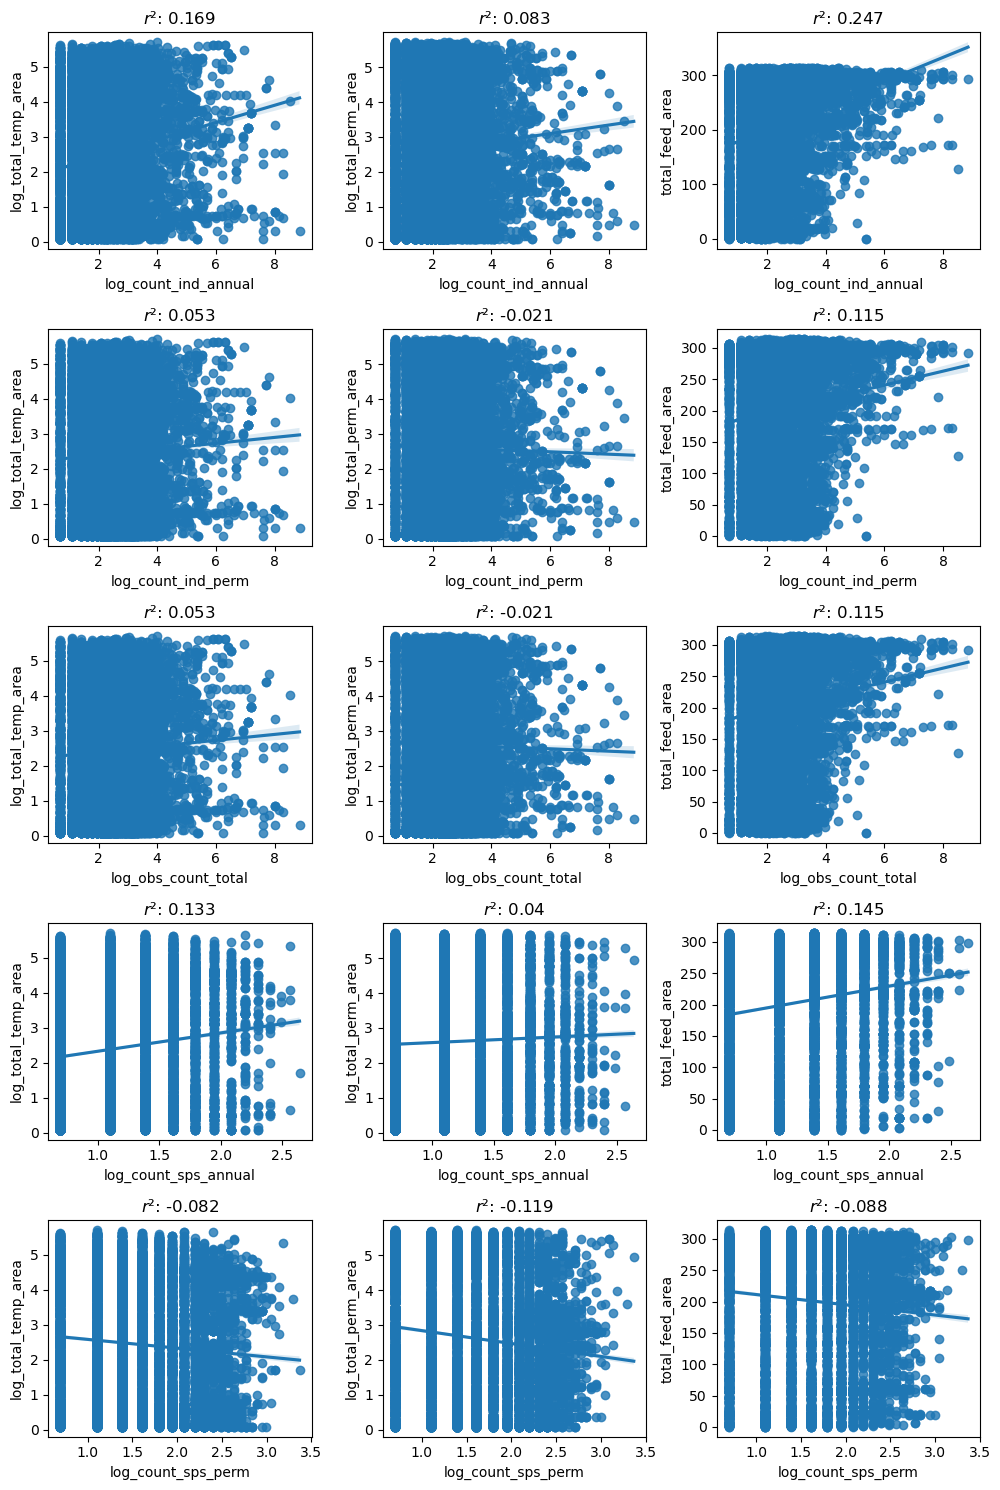

In [27]:
# plot scatterplots between some biodiversity and cropland area variables

vars_bird = corr_data_biodiv[['log_count_ind_annual', 'log_count_ind_perm', 
           'log_obs_count_total', 'log_count_sps_annual', 'log_count_sps_perm']]

vars_land = corr_data_biodiv[['log_total_temp_area', 'log_total_perm_area', 'total_feed_area']]

"""vars_land = corr_data_biodiv[['log_total_temp_area',
           'log_total_perm_area',  'entr_f_area', 'log_total_crop_area', 
           'log_total_wood_area', 'total_feed_area']]

"""
print_biplots(vars_bird, vars_land)


In [28]:
# calculate correlations
corr = corr_data_biodiv.corr(method='pearson').round(2)
corr.style.background_gradient(cmap='coolwarm')

,log_count_ind_annual,log_count_ind_perm,log_obs_count_total,log_count_sps_annual,log_count_sps_perm,shannon,richness,log_total_temp_area,log_total_perm_area,entr_f_area,log_total_crop_area,log_total_wood_area,total_feed_area
log_count_ind_annual,1.000000,0.910000,0.910000,0.580000,0.310000,0.010000,0.310000,0.170000,0.080000,-0.030000,0.130000,-0.040000,0.250000
log_count_ind_perm,0.910000,1.000000,1.000000,0.550000,0.540000,0.260000,0.520000,0.050000,-0.020000,-0.020000,0.010000,0.080000,0.110000
log_obs_count_total,0.910000,1.000000,1.000000,0.550000,0.540000,0.260000,0.520000,0.050000,-0.020000,-0.020000,0.010000,0.080000,0.110000
log_count_sps_annual,0.580000,0.550000,0.550000,1.000000,0.730000,0.590000,0.710000,0.130000,0.040000,0.070000,0.090000,0.070000,0.150000
log_count_sps_perm,0.310000,0.540000,0.540000,0.730000,1.000000,0.920000,0.950000,-0.080000,-0.120000,0.100000,-0.120000,0.280000,-0.090000
shannon,0.010000,0.260000,0.260000,0.590000,0.920000,1.000000,0.850000,-0.120000,-0.150000,0.100000,-0.160000,0.280000,-0.160000
richness,0.310000,0.520000,0.520000,0.710000,0.950000,0.850000,1.000000,-0.050000,-0.100000,0.140000,-0.100000,0.290000,-0.070000
log_total_temp_area,0.170000,0.050000,0.050000,0.130000,-0.080000,-0.120000,-0.050000,1.000000,0.590000,0.600000,0.830000,-0.380000,0.470000
log_total_perm_area,0.080000,-0.020000,-0.020000,0.040000,-0.120000,-0.150000,-0.100000,0.590000,1.000000,0.340000,0.920000,-0.300000,0.550000
entr_f_area,-0.030000,-0.020000,-0.020000,0.070000,0.100000,0.100000,0.140000,0.600000,0.340000,1.000000,0.470000,-0.040000,-0.100000


In [29]:
corr_data_biodiv.shape

(10912, 13)